# T-SNE 


## 1. Datacamp tutorial

source: https://www.datacamp.com/tutorial/introduction-t-sne 

In [2]:
import plotly.express as px
from sklearn.datasets import make_classification

X, y = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=1500,
    n_informative=2,
    random_state=5,
    n_clusters_per_class=1,
)

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], color=y, opacity=0.8)
fig.show()


In [4]:
print(X.dtype)
print(X.ndim)
print(X.shape)
print(type(X))

float64
2
(1500, 6)
<class 'numpy.ndarray'>


We will now apply the PCA algorithm on the dataset to return two PCA components. The fit_transform() learns and transforms the dataset at the same time. 

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
#print(X_pca)
print(X_pca.dtype)
print(X_pca.ndim)
print(X_pca.shape)
print(type(X_pca))




float64
2
(1500, 2)
<class 'numpy.ndarray'>


In [4]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
fig.update_layout(
    title="PCA visualization of Custom Classification dataset",
    xaxis_title="First Principal Component",
    yaxis_title="Second Principal Component",
)
fig.show()

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne.kl_divergence_

1.1273040771484375

In [13]:
print(X_tsne)
print(X_tsne.ndim)
print(X_tsne.size)
print(type(X_tsne))

[[ 33.27499      1.0507247 ]
 [-27.427927   -31.962608  ]
 [ -0.18679239  29.168802  ]
 ...
 [ 37.367233   -15.860328  ]
 [ -8.352642    48.3704    ]
 [ 22.517677   -11.506373  ]]
2
3000
<class 'numpy.ndarray'>


In [6]:
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y)
fig.update_layout(
    title="t-SNE visualization of Custom Classification dataset",
    xaxis_title="First t-SNE",
    yaxis_title="Second t-SNE",
)
fig.show()

## 2. Perplexity example

#### Explanation
To perform dimensionality reduction on CLIP embeddings, you can follow these steps:

1. Understand the Purpose of Dimensionality Reduction

CLIP embeddings are high-dimensional (e.g., 512 dimensions for the base model). Dimensionality reduction helps reduce computational complexity, enables visualization, and facilitates clustering while retaining meaningful relationships in the data.

2. Choose a Dimensionality Reduction Technique

PCA (Principal Component Analysis): Useful for reducing dimensions while preserving variance. Often used as a preprocessing step before other techniques like t-SNE or UMAP13.
t-SNE (t-Distributed Stochastic Neighbor Embedding): Non-linear technique ideal for visualizing high-dimensional data in 2D or 3D78.
UMAP (Uniform Manifold Approximation and Projection): Similar to t-SNE but faster and better at preserving global structure.

3. Preprocessing Steps

Normalize the embeddings (e.g., using L2 normalization) to ensure consistent scaling3.
Optionally, apply PCA to reduce dimensions before t-SNE or UMAP for faster computation and improved results16

In [13]:
import torch
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Example: Load CLIP embeddings (torch tensor of shape [N, 512])
embeddings = torch.rand(223, 512)  # Replace with your actual embeddings

print(embeddings.shape)
print(embeddings.ndim)
print(embeddings.dtype)
print(embeddings[0].shape)


torch.Size([223, 512])
2
torch.float32
torch.Size([512])


In [12]:
# Step 1: Convert to NumPy array
embeddings_np = embeddings.detach().cpu().numpy()

print(embeddings_np.shape)
print(embeddings_np.ndim)
print(embeddings_np.dtype)
print(type(embeddings_np))


(223, 512)
2
float32
<class 'numpy.ndarray'>


In [14]:
# Step 2: Normalize the embeddings
embeddings_np = embeddings_np / np.linalg.norm(embeddings_np, axis=1, keepdims=True)

from sklearn.decomposition import PCA
# Step 3: Apply PCA to reduce dimensions (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for faster t-SNE
embeddings_pca = pca.fit_transform(embeddings_np)

print(embeddings_pca.shape)
print(embeddings_pca.ndim)
print(embeddings_pca.dtype)
print(type(embeddings_pca))

(223, 2)
2
float32
<class 'numpy.ndarray'>


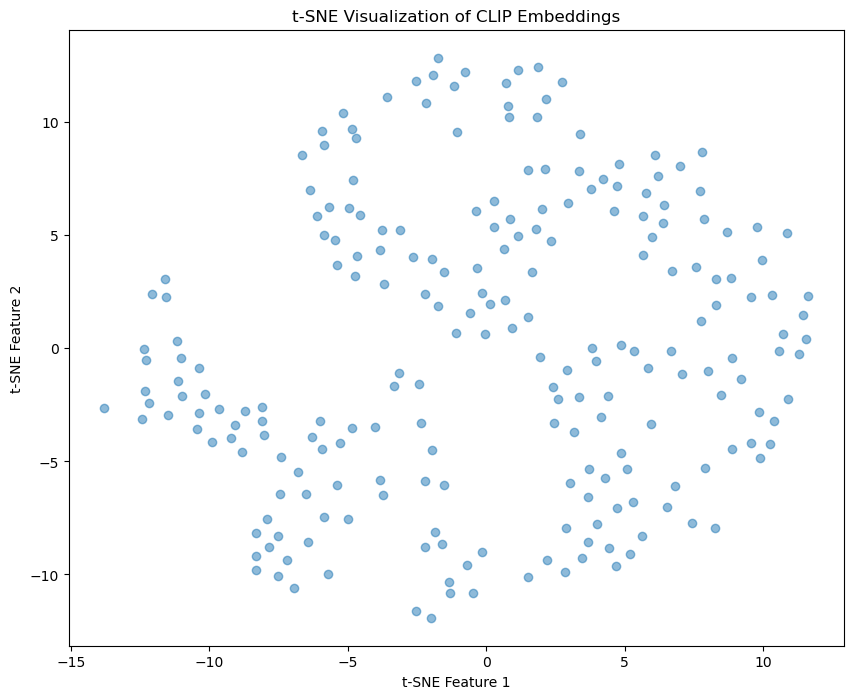

In [15]:


# Step 4: Apply t-SNE to reduce to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings_pca)

# Step 5: Visualize the reduced embeddings
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], alpha=0.5)
plt.title('t-SNE Visualization of CLIP Embeddings')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
